In [3]:
import numpy as np
import matplotlib.pyplot as plt
from rdkit import Chem
from rdkit.Chem import rdMolDescriptors
import seaborn as sns
import pandas as pd
import pandas as pd
from rdkit import Chem
from rdkit.Chem import AllChem
sns.set(style="white")

In [4]:
# 从CSV文件读取参考分子数据
ref_FDA_df = pd.read_csv('FDA.csv')
# 从CSV文件读取感兴趣的分子数据
query_mols_df = pd.read_csv("macoycle_1.csv")

# 获取分子的名称列
name_column = query_mols_df["Name"]

# 设定构象生成的参数
params = AllChem.ETKDGv2()
params.numThreads = 0  # 设定线程数量为0，使用所有可用核心

your_molecules = []  # 初始化一个空列表来存储分子对象

# 为每个SMILES字符串生成分子对象，生成构象，并设置名称属性
for i, smiles in enumerate(query_mols_df["SMILES"]):
    mol = Chem.MolFromSmiles(smiles)
    if mol is not None:  # 检查SMILES字符串是否成功转换为分子对象
        mol = Chem.AddHs(mol)  # 添加氢原子
        success = AllChem.EmbedMolecule(mol, params)  # 使用ETKDGv2生成构象
        if success == 0:  # 检查构象是否成功生成
            AllChem.UFFOptimizeMolecule(mol)  # 用UFF分子力场优化构象
            mol.SetProp('NAME', str(name_column[i]))  # 设置分子对象的名称属性
            your_molecules.append(mol)  # 将分子对象添加到列表中
        else:
            print(f"Failed to generate conformation for molecule {name_column[i]} with SMILES {smiles}")
    else:
        print(f"Invalid SMILES string for molecule {name_column[i]}: {smiles}")

query_mols_df = [x for x in your_molecules if x is not None]
query_mols_NPR1 = [rdMolDescriptors.CalcNPR1(m) for m in query_mols_df]
query_mols_NPR2 = [rdMolDescriptors.CalcNPR2(m) for m in query_mols_df]

ref_mols_NPR1 = ref_FDA_df['NPR1']
ref_mols_NPR2 = ref_FDA_df['NPR2']

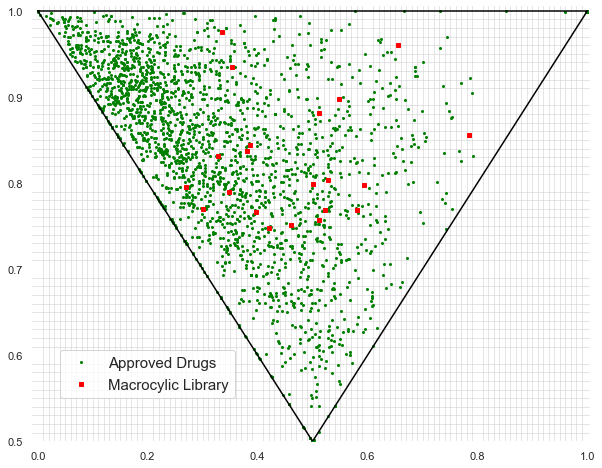

In [5]:
# 绘制图形
plt.figure(figsize=(10, 8),facecolor="white")
plt.plot(ref_mols_NPR1, ref_mols_NPR2, '.', ms=4, color='green', label='Approved Drugs')  # 添加CSV数据
plt.plot(query_mols_NPR1, query_mols_NPR2, 's', ms=4, color='red', label='Macrocylic Library')
xx = np.linspace(0, 1, 100)
plt.plot(xx, 1 - xx, 'black', alpha=1.0)
plt.plot(xx, np.ones(100), 'black', alpha=1.0)
plt.plot(xx, xx, 'black', alpha=1.0)

plt.xlim(-0.01, 1.005)
plt.ylim(0.5, 1.005)
plt.legend(fontsize=15, loc=(0.05,0.1))

ax = plt.gca()
for spine in ax.spines.values():
    spine.set_visible(False)

xticks = np.arange(0, 1.01, 0.01)
yticks = np.arange(0.5, 1.01, 0.01)

ax.set_xticks(xticks, minor=True)
ax.set_yticks(yticks, minor=True)
ax.grid(which='minor', alpha=0.5)
plt.show()